In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

### Load Data
Inventory
Price

In [111]:
inventory = pd.read_csv('C:\\Users\\abaker\\OneDrive - CAPTECH VENTURES INC\\Desktop\\EggInventory.csv') #Transformed

In [101]:
price = pd.read_csv('C:\\Users\\abaker\\OneDrive - CAPTECH VENTURES INC\\Desktop\\FredEggPriceData.csv') #Transformed

In [90]:
molting = pd.read_csv('C:\\Users\\abaker\\OneDrive - CAPTECH VENTURES INC\\Desktop\\MoltingPercent.csv')

In [91]:
pullet = pd.read_csv('C:\\Users\\abaker\\OneDrive - CAPTECH VENTURES INC\\Desktop\\ChickenPulletsReplacements.csv')

In [92]:
hatching = pd.read_csv('C:\\Users\\abaker\\OneDrive - CAPTECH VENTURES INC\\Desktop\\LayersHatching.csv')

In [93]:
cinv = pd.read_csv('C:\\Users\\abaker\\OneDrive - CAPTECH VENTURES INC\\Desktop\\ChickenInventory.csv')

In [94]:
cpi = pd.read_csv('C:\\Users\\abaker\\OneDrive - CAPTECH VENTURES INC\\Desktop\\CPIAUCNS.csv')

In [95]:
layrate = pd.read_csv('C:\\Users\\abaker\\OneDrive - CAPTECH VENTURES INC\\Desktop\\rateoflay.csv')

### Functions

In [13]:
def month_quickstat(inventory):
    inventory['Month'] = -999

    inventory.loc[inventory["Period"].str.find('JAN') > -1, 'Month'] = 1
    inventory.loc[inventory["Period"].str.find('FEB') > -1, 'Month'] = 2
    inventory.loc[inventory["Period"].str.find('MAR') > -1, 'Month'] = 3
    inventory.loc[inventory["Period"].str.find('APR') > -1, 'Month'] = 4
    inventory.loc[inventory["Period"].str.find('MAY') > -1, 'Month'] = 5
    inventory.loc[inventory["Period"].str.find('JUN') > -1, 'Month'] = 6
    inventory.loc[inventory["Period"].str.find('JUL') > -1, 'Month'] = 7
    inventory.loc[inventory["Period"].str.find('AUG') > -1, 'Month'] = 8
    inventory.loc[inventory["Period"].str.find('SEP') > -1, 'Month'] = 9
    inventory.loc[inventory["Period"].str.find('OCT') > -1, 'Month'] = 10
    inventory.loc[inventory["Period"].str.find('NOV') > -1, 'Month'] = 11
    inventory.loc[inventory["Period"].str.find('DEC') > -1, 'Month'] = 12
    
    return(inventory)

In [14]:
def date_quickstat(inventory):
    
    inventory['Date'] = dt.datetime(2000,12,1)
    for i in range(len(inventory['Year'])):
        #print(i)
        inventory.loc[i,'Date'] = dt.datetime(inventory.loc[i,'Year'], inventory.loc[i,'Month'],1)
    return(inventory)

In [105]:
def fix_value(inventory):
    inventory['Value'] = inventory['Value'].str.replace(",","").astype(float)
    inventory = inventory.sort_values(['Year', 'Month'])
    return(inventory)

### Cleaning Data
#### Price

In [102]:
price.DATE=price.DATE.astype(str)
price['DATE'] = pd.to_datetime(price.DATE.str.split(',\s*').str[0])
price = price.set_axis(['Date', 'Price'], axis=1)
price.Date.apply(lambda x: x.date())

0      2012-12-01
1      2013-01-01
2      2013-02-01
3      2013-03-01
4      2013-04-01
          ...    
116    2022-08-01
117    2022-09-01
118    2022-10-01
119    2022-11-01
120    2022-12-01
Name: Date, Length: 121, dtype: object

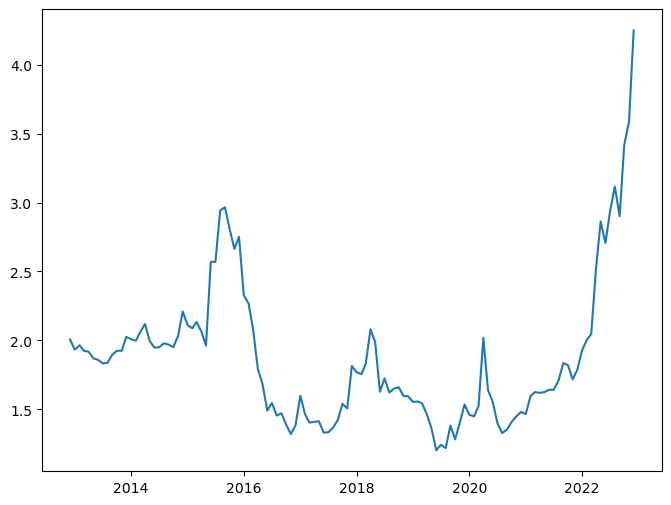

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(price['DATE'], price['Price']);

#### Inventory 

In [113]:
inventory['Month'] = -999

inventory.loc[inventory["Period"].str.find('JAN') > -1, 'Month'] = 1
inventory.loc[inventory["Period"].str.find('FEB') > -1, 'Month'] = 2
inventory.loc[inventory["Period"].str.find('MAR') > -1, 'Month'] = 3
inventory.loc[inventory["Period"].str.find('APR') > -1, 'Month'] = 4
inventory.loc[inventory["Period"].str.find('MAY') > -1, 'Month'] = 5
inventory.loc[inventory["Period"].str.find('JUN') > -1, 'Month'] = 6
inventory.loc[inventory["Period"].str.find('JUL') > -1, 'Month'] = 7
inventory.loc[inventory["Period"].str.find('AUG') > -1, 'Month'] = 8
inventory.loc[inventory["Period"].str.find('SEP') > -1, 'Month'] = 9
inventory.loc[inventory["Period"].str.find('OCT') > -1, 'Month'] = 10
inventory.loc[inventory["Period"].str.find('NOV') > -1, 'Month'] = 11
inventory.loc[inventory["Period"].str.find('DEC') > -1, 'Month'] = 12

In [114]:
#inventory.apply(lambda inv: dt.datetime(inventory['Year'],inventory['Month'],1))
inventory['Date'] = dt.datetime(2000,12,1)
for i in range(len(inventory['Year'])):
    #print(i)
    inventory.loc[i,'Date'] = dt.datetime(inventory.loc[i,'Year'], inventory.loc[i,'Month'],1)


#dt.datetime(inventory['Year'],inventory['Month'],1)

In [115]:
inventory = fix_value(inventory)

In [116]:
#df.sort_values(by = ['Rank', 'Age'], ascending = [True, False], na_position = 'first')
inventory = inventory.sort_values(['Year', 'Month'])

In [117]:
inventory = inventory[['Date','Value']]
inventory = inventory.set_axis(['Date', 'Egg_Inventory'], axis=1)

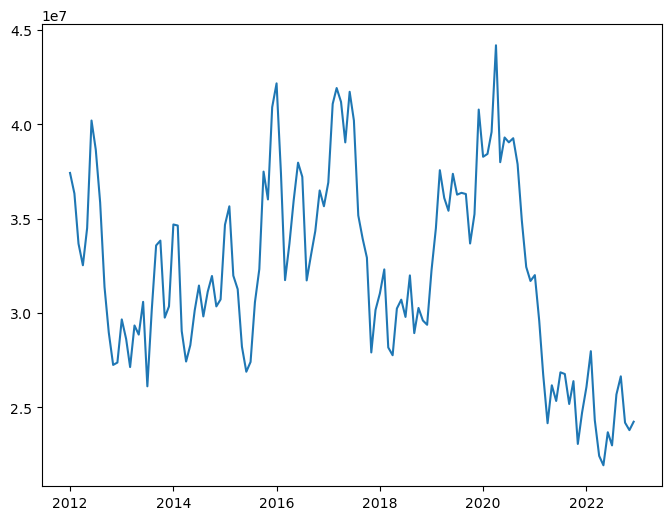

In [118]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(inventory['Date'], inventory['Egg_Inventory']);

#### Molting

In [119]:
molting = month_quickstat(molting)

In [120]:
molting = date_quickstat(molting)

In [121]:
molting = molting[['Date','Value']]
#molting = fix_value(molting)

In [122]:
molting = molting.set_axis(['Date', 'Molting_Pct'], axis=1)

#### Pullet

In [123]:
pullet = month_quickstat(pullet)
pullet = date_quickstat(pullet)
pullet = fix_value(pullet)
pullet = pullet[['Date','Value']]
pullet = pullet.set_axis(['Date', 'Pullet'], axis=1)


In [124]:
pullet

,Date,Pullet
127,2012-01-01,105257000.0
126,2012-02-01,105537000.0
130,2012-03-01,105578000.0
123,2012-04-01,107167000.0
131,2012-05-01,106511000.0
...,...,...
14,2022-09-01,126102000.0
13,2022-10-01,126378000.0
12,2022-11-01,127775000.0
5,2022-12-01,128835000.0


#### hatching

In [125]:
hatching = month_quickstat(hatching)
hatching = date_quickstat(hatching)
hatching = fix_value(hatching)
hatching = hatching[['Date','Value']]
hatching = hatching.set_axis(['Date', 'Hatching'], axis=1)

##### Chicken Inventory

In [126]:
cinv = month_quickstat(cinv)
cinv = date_quickstat(cinv)
cinv = fix_value(cinv)
cinv = cinv[['Date','Value']]
cinv = cinv.set_axis(['Date', 'Chicken_Inv'], axis=1)

#### cpi

In [127]:
cpi.DATE=cpi.DATE.astype(str)
cpi['DATE'] = pd.to_datetime(cpi.DATE.str.split(',\s*').str[0])
cpi = cpi.set_axis(['Date', 'CPI'], axis=1)
cpi.Date.apply(lambda x: x.date())


0       1913-01-01
1       1913-02-01
2       1913-03-01
3       1913-04-01
4       1913-05-01
           ...    
1315    2022-08-01
1316    2022-09-01
1317    2022-10-01
1318    2022-11-01
1319    2022-12-01
Name: Date, Length: 1320, dtype: object

#### Layrate

In [128]:
layrate = month_quickstat(layrate)
layrate = date_quickstat(layrate)
layrate = fix_value(layrate)
layrate = layrate[['Date','Value']]
layrate = layrate.set_axis(['Date', 'Lay_Rate'], axis=1)

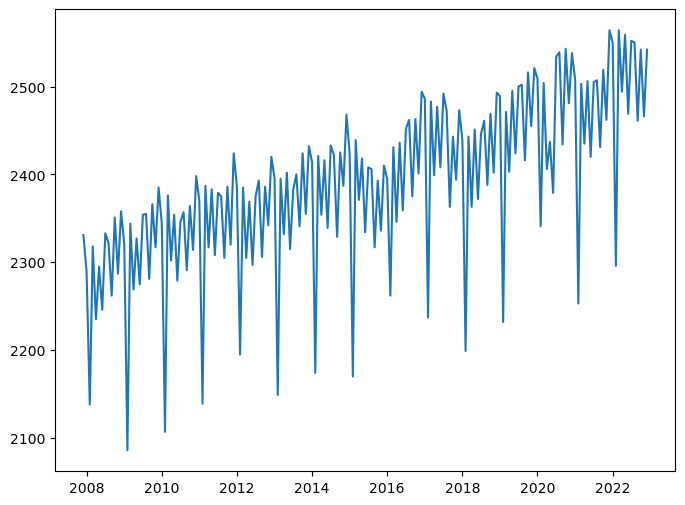

In [129]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(layrate['Date'], layrate['Lay_Rate']);

#### Merge Data

In [131]:
df = pd.merge(price, inventory,how="inner",
    on='Date',)
df = pd.merge(df, molting, how = 'inner', on='Date')
df = pd.merge(df, pullet, how = 'inner', on='Date')
df = pd.merge(df, hatching, how = 'inner', on='Date')
df = pd.merge(df, cinv, how = 'inner', on='Date')
df = pd.merge(df, cpi, how = 'inner', on='Date')
df = pd.merge(df, layrate, how = 'inner', on='Date')

In [132]:
print(df.shape)
print(df.columns)
df[['Date','Price','Egg_Inventory','Molting_Pct','Pullet','Hatching', 'Chicken_Inv', 'CPI', 'Lay_Rate']].head(4)

(123, 9)
Index(['Date', 'Price', 'Egg_Inventory', 'Molting_Pct', 'Pullet', 'Hatching',
       'Chicken_Inv', 'CPI', 'Lay_Rate'],
      dtype='object')


,Date,Price,Egg_Inventory,Molting_Pct,Pullet,Hatching,Chicken_Inv,CPI,Lay_Rate
0,2012-12-01,2.007,27376000.0,1.5,110297133.0,53238000.0,354903000.0,229.601,2420.0
1,2012-12-01,2.007,27376000.0,1.5,105140000.0,53238000.0,354903000.0,229.601,2420.0
2,2013-01-01,1.933,29659000.0,2.9,107788000.0,54748000.0,354996000.0,230.280,2396.0
3,2013-02-01,1.965,28620000.0,3.6,108229000.0,54589000.0,356478000.0,232.166,2149.0


In [134]:
df.corr()['Price']

Price            1.000000
Egg_Inventory   -0.463364
Molting_Pct     -0.090813
Pullet          -0.071171
Hatching         0.038231
Chicken_Inv     -0.538827
CPI              0.292549
Lay_Rate        -0.004364
Name: Price, dtype: float64

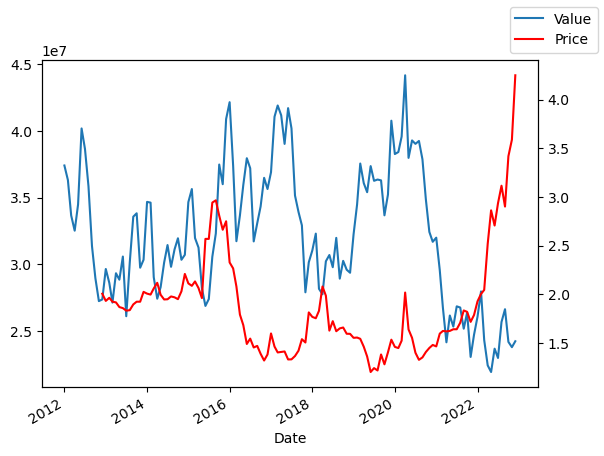

In [94]:
ax = df.plot(x="Date", y="Value", legend=False)
ax2 = ax.twinx()
df.plot(x="Date", y="Price", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

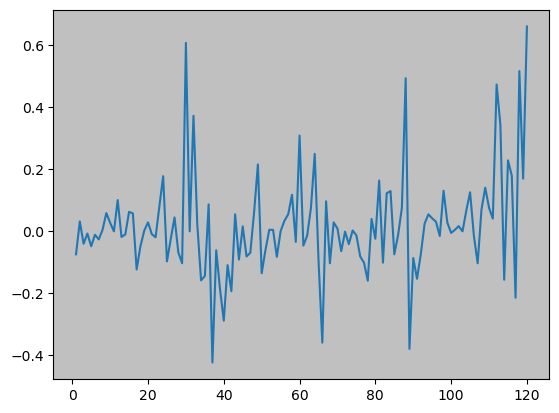

In [100]:
ax = plt.axes()
series2 = df.Price.diff().dropna() #first order differenced series
ax.set_facecolor('silver')
plt.plot(series2)

C:\Users\abaker\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


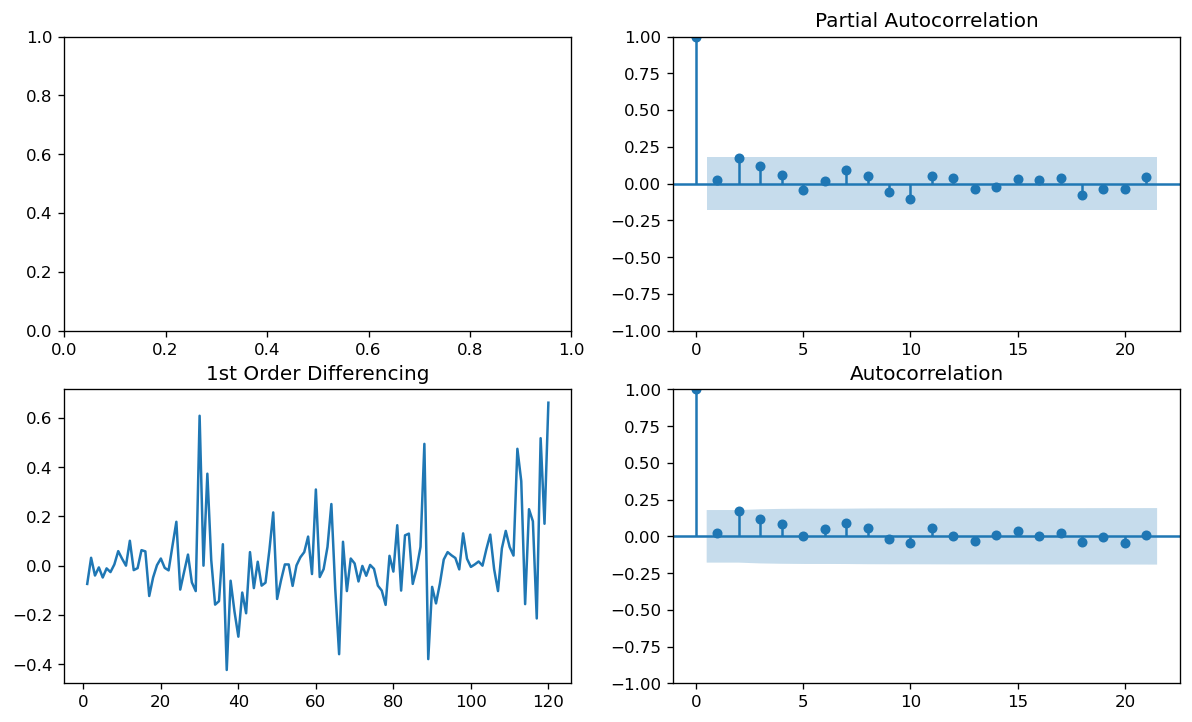

In [105]:
plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(2, 2)
# 1st Differencing
axes[1, 0].plot(series2); 
axes[1, 0].set_title('1st Order Differencing')
plot_pacf(series2, ax=axes[0, 1])
plot_acf(series2, ax=axes[1, 1])
plt.show()

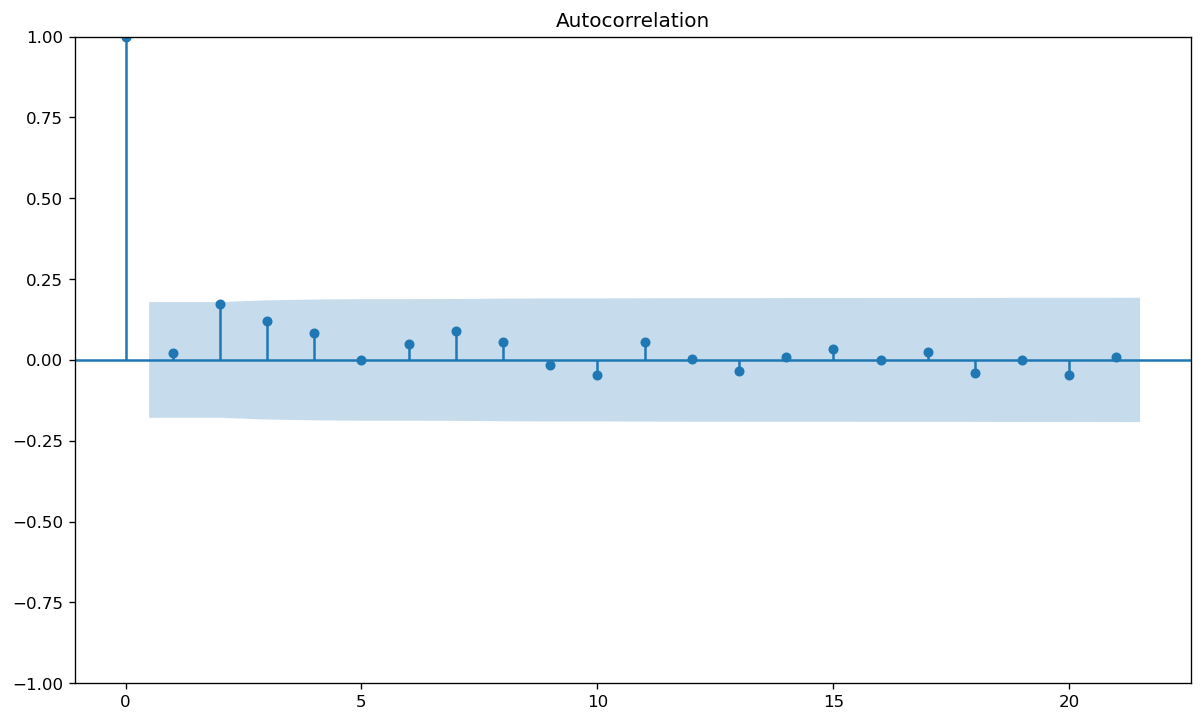

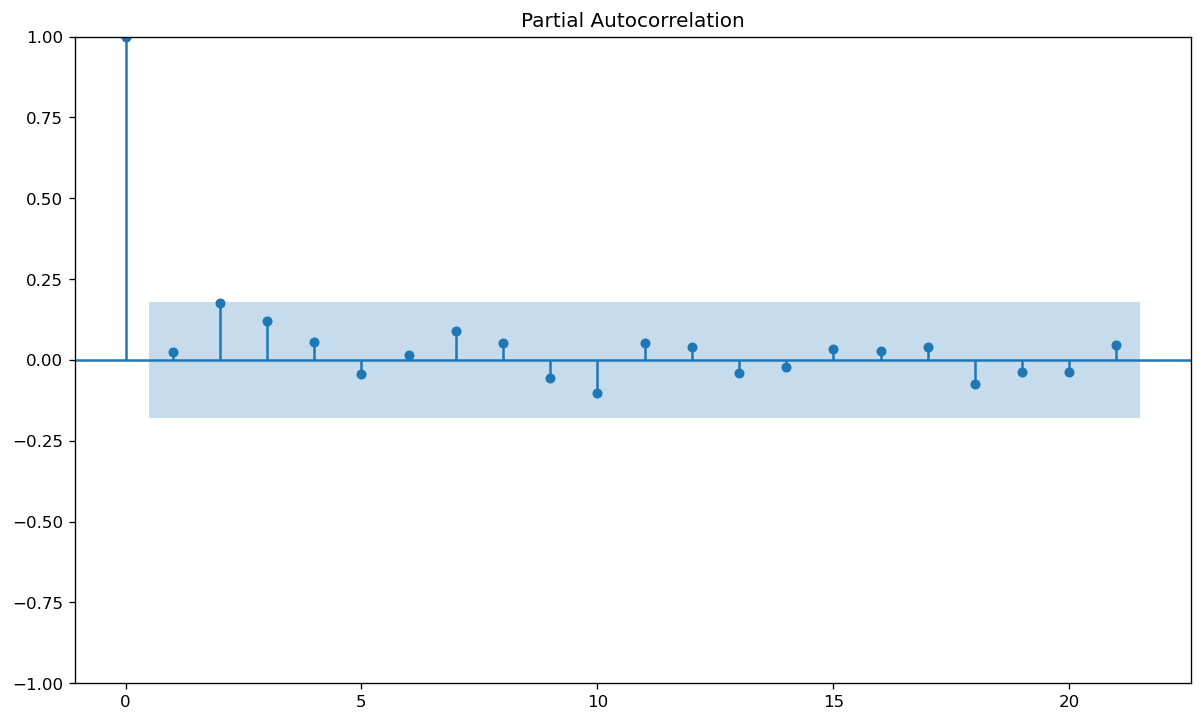

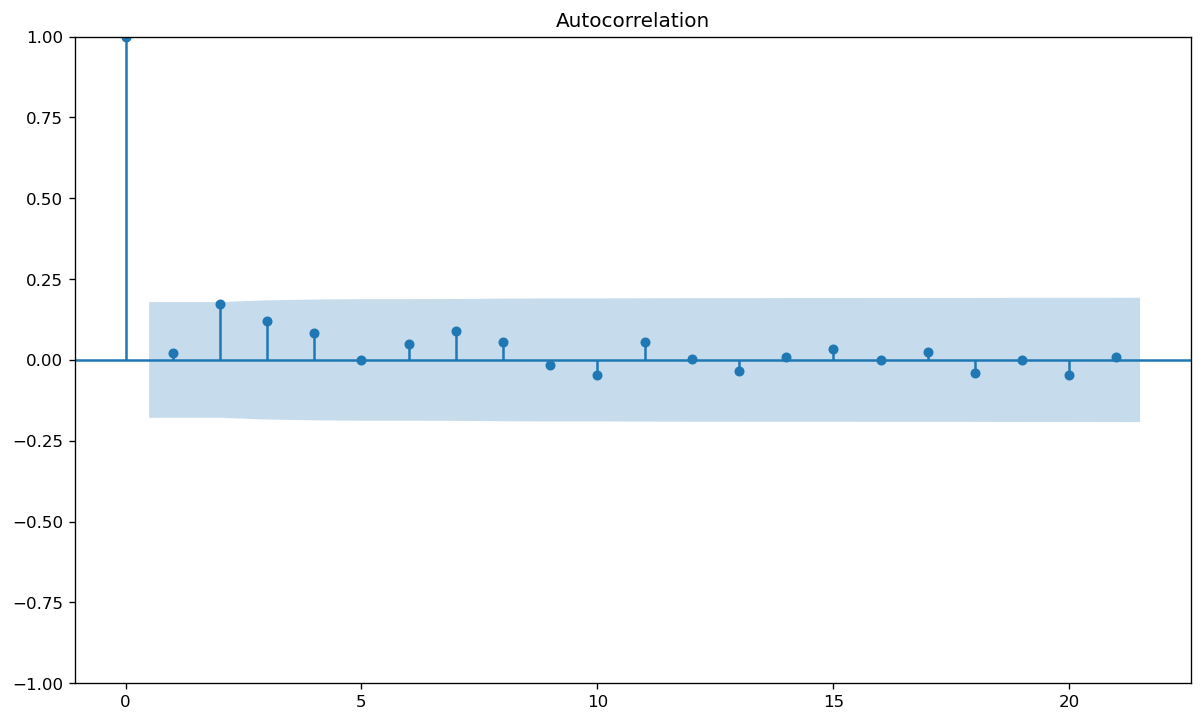

In [106]:
plot_pacf(series2)
plot_acf(series2)

In [127]:
# 0,1,0 ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.Price.dropna(), order=(0,1,0))
model_fitted = model.fit()
print(model_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  121
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  44.460
Date:                Fri, 03 Feb 2023   AIC                            -86.920
Time:                        00:46:19   BIC                            -84.132
Sample:                             0   HQIC                           -85.788
                                - 121                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0279      0.002     13.384      0.000       0.024       0.032
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                89.66
Prob(Q):                              0.80   Pr

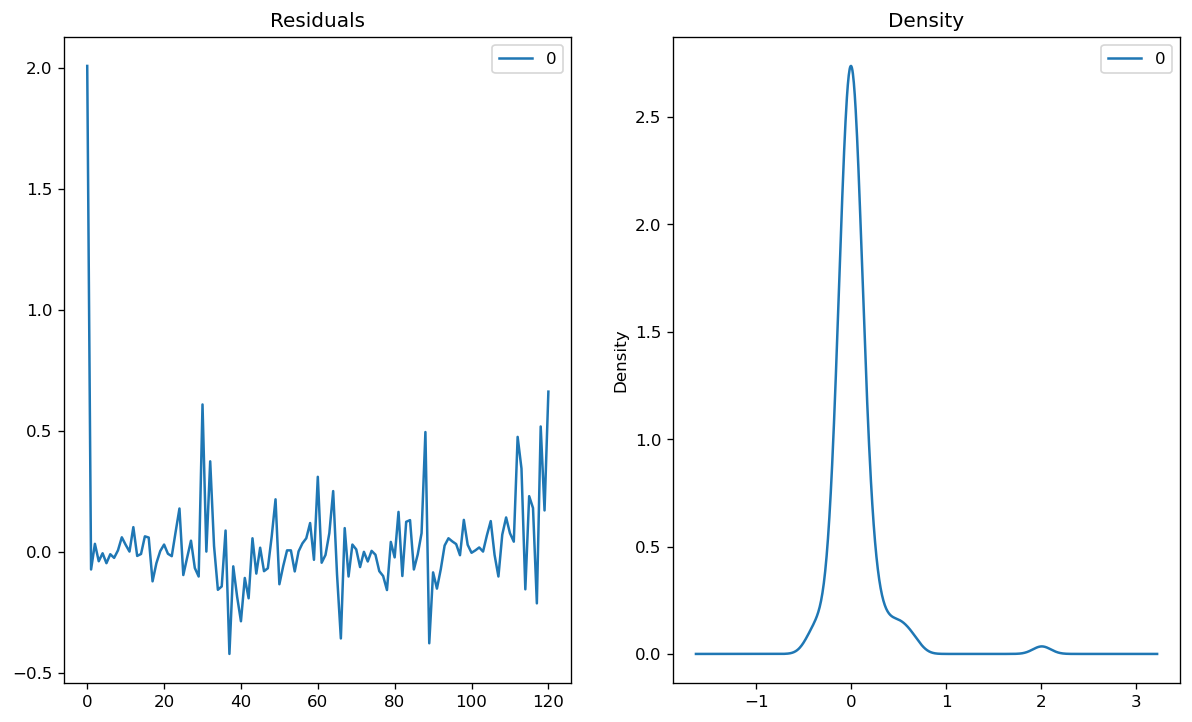

In [120]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

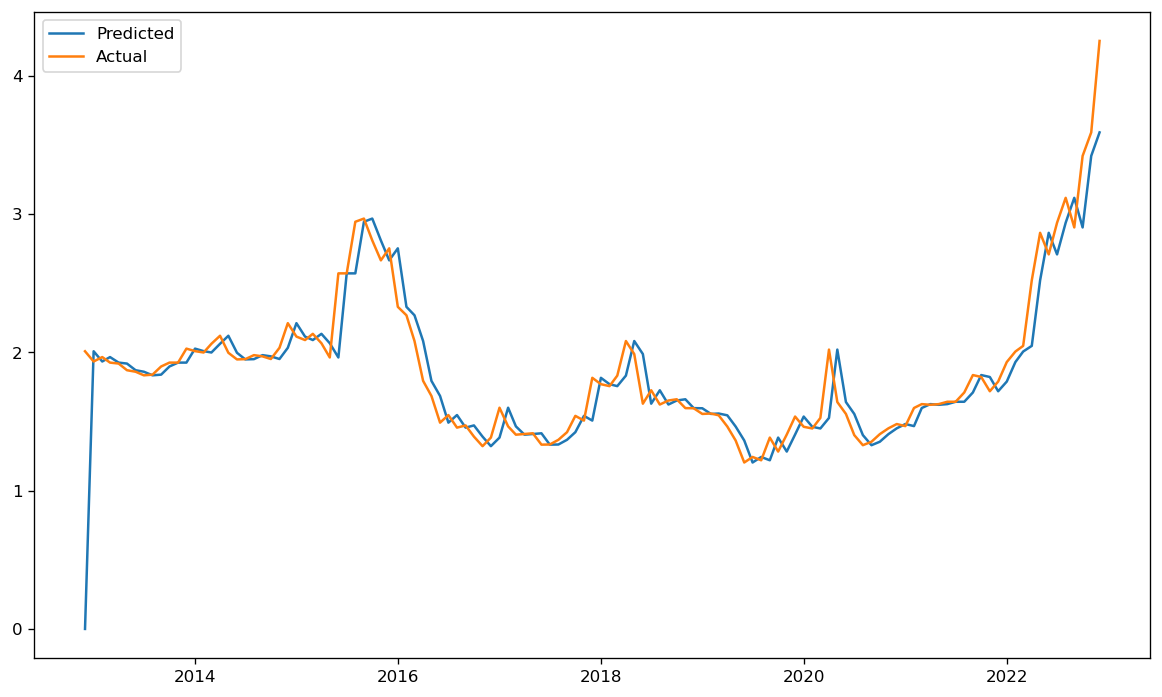

In [134]:


df['Fitted'] = model_fit.fittedvalues 

plt.plot(df['Date'], df['Fitted'], label = "Predicted")
plt.plot(df['Date'], df['Price'], label = "Actual")
plt.legend()
plt.show()

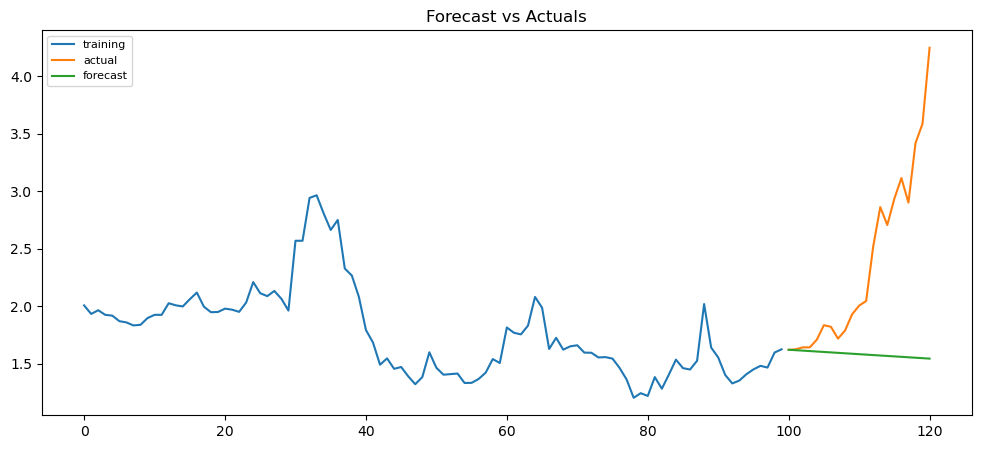

In [149]:
series1 = df.Price
train = series1.dropna()[:100] #first 200 rows in the training set
test = series1.dropna()[100:] #remaining rows in the test set
#If it is not a time series, then this is not the ideal way for #train-test split. You may use scikit-learn library and use function #train_test_split() by providing the ratio. Since this is a time-#series data set, we cannot use future values to predict past #values.
# Build Model
# model = ARIMA(train, order=(0,1,0))  
model = ARIMA(train, order=(0, 2, 1))  
fitted = model.fit()
# Forecast
fc = fitted.forecast(32, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
 #                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-98.746, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-96.999, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-96.951, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-100.675, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-95.544, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.784 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  51.337
Date:                Fri, 03 Feb 2023   AIC                           -100.675
Time:                        01:06:41   BIC                            -98.080
Sample:                             0   HQIC                           -99.625
                                - 100                                         
C

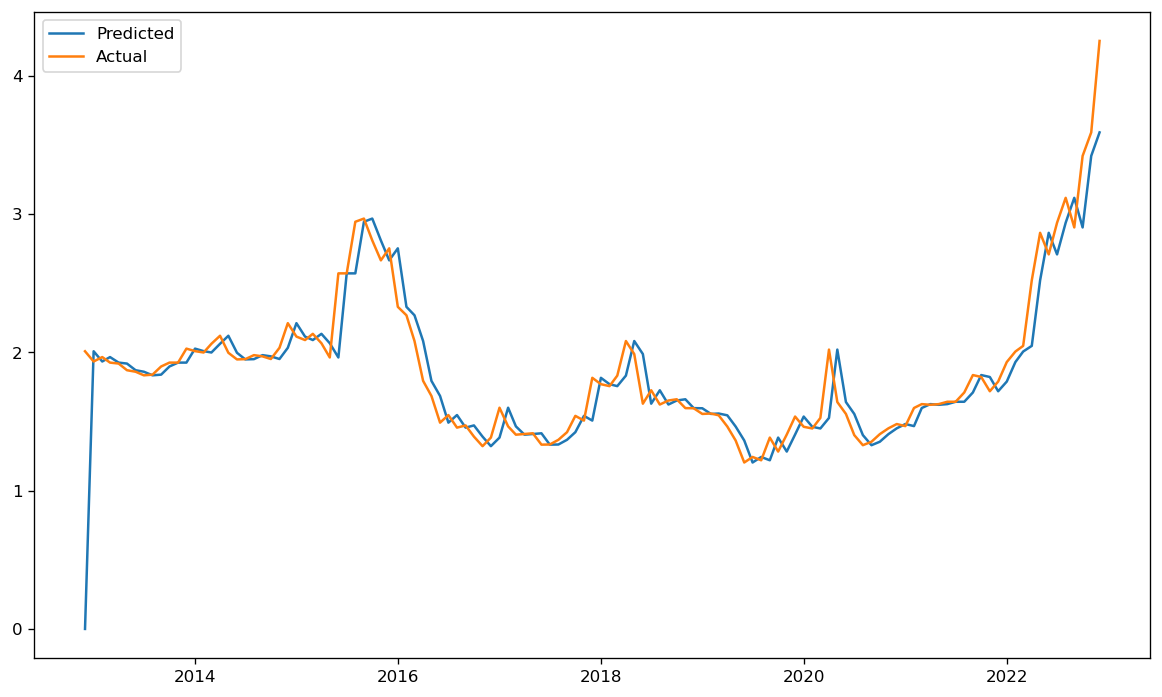

In [150]:
model = pm.auto_arima(series1[:100].dropna(), start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3,
                      max_d=2,# maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

# 0,1,0 ARIMA Model
#from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.Price.dropna(), order=(0,2,1))
model_fitted = model.fit()



df['Fitted'] = model_fit.fittedvalues 

plt.plot(df['Date'], df['Fitted'], label = "Predicted")
plt.plot(df['Date'], df['Price'], label = "Actual")
plt.legend()
plt.show()

In [55]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = df[['Price','Value']]
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
print(values)
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[3]], axis=1, inplace=True)
print(reframed.head())

[[2.0070e+00 2.7376e+07]
 [1.9330e+00 2.9659e+07]
 [1.9650e+00 2.8620e+07]
 [1.9250e+00 2.7138e+07]
 [1.9180e+00 2.9339e+07]
 [1.8700e+00 2.8856e+07]
 [1.8590e+00 3.0591e+07]
 [1.8330e+00 2.6118e+07]
 [1.8380e+00 3.0144e+07]
 [1.8970e+00 3.3577e+07]
 [1.9250e+00 3.3832e+07]
 [1.9250e+00 2.9754e+07]
 [2.0260e+00 3.0350e+07]
 [2.0080e+00 3.4687e+07]
 [1.9980e+00 3.4631e+07]
 [2.0610e+00 2.9044e+07]
 [2.1190e+00 2.7430e+07]
 [1.9960e+00 2.8300e+07]
 [1.9480e+00 3.0142e+07]
 [1.9500e+00 3.1453e+07]
 [1.9790e+00 2.9820e+07]
 [1.9700e+00 3.1126e+07]
 [1.9510e+00 3.1960e+07]
 [2.0320e+00 3.0349e+07]
 [2.2100e+00 3.0718e+07]
 [2.1130e+00 3.4670e+07]
 [2.0880e+00 3.5648e+07]
 [2.1330e+00 3.1978e+07]
 [2.0650e+00 3.1260e+07]
 [1.9620e+00 2.8216e+07]
 [2.5700e+00 2.6890e+07]
 [2.5700e+00 2.7408e+07]
 [2.9430e+00 3.0572e+07]
 [2.9660e+00 3.2324e+07]
 [2.8080e+00 3.7486e+07]
 [2.6640e+00 3.6013e+07]
 [2.7510e+00 4.0896e+07]
 [2.3280e+00 4.2158e+07]
 [2.2670e+00 3.7400e+07]
 [2.0810e+00 3.1741e+07]


In [30]:
...
# split into train and test sets
values = reframed.values
n_train_hours = 100
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(100, 1, 2) (100,) (20, 1, 2) (20,)


Epoch 1/60
4/4 - 2s - loss: 0.1833 - val_loss: 0.3742 - 2s/epoch - 608ms/step
Epoch 2/60
4/4 - 0s - loss: 0.1630 - val_loss: 0.3564 - 84ms/epoch - 21ms/step
Epoch 3/60
4/4 - 0s - loss: 0.1439 - val_loss: 0.3387 - 91ms/epoch - 23ms/step
Epoch 4/60
4/4 - 0s - loss: 0.1286 - val_loss: 0.3215 - 87ms/epoch - 22ms/step
Epoch 5/60
4/4 - 0s - loss: 0.1182 - val_loss: 0.3054 - 87ms/epoch - 22ms/step
Epoch 6/60
4/4 - 0s - loss: 0.1110 - val_loss: 0.2907 - 83ms/epoch - 21ms/step
Epoch 7/60
4/4 - 0s - loss: 0.1066 - val_loss: 0.2780 - 83ms/epoch - 21ms/step
Epoch 8/60
4/4 - 0s - loss: 0.1033 - val_loss: 0.2672 - 79ms/epoch - 20ms/step
Epoch 9/60
4/4 - 0s - loss: 0.1007 - val_loss: 0.2579 - 70ms/epoch - 18ms/step
Epoch 10/60
4/4 - 0s - loss: 0.0988 - val_loss: 0.2500 - 100ms/epoch - 25ms/step
Epoch 11/60
4/4 - 0s - loss: 0.0972 - val_loss: 0.2434 - 81ms/epoch - 20ms/step
Epoch 12/60
4/4 - 0s - loss: 0.0957 - val_loss: 0.2379 - 77ms/epoch - 19ms/step
Epoch 13/60
4/4 - 0s - loss: 0.0943 - val_loss: 0

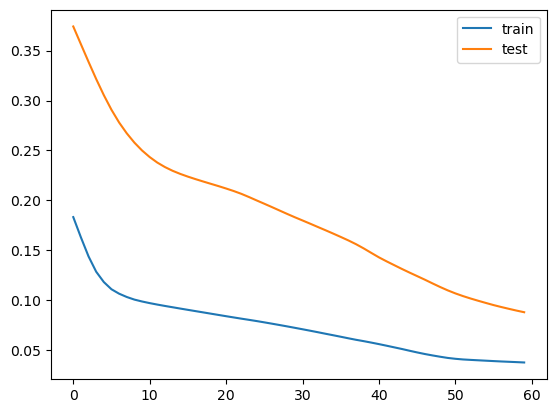

In [37]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=25, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [40]:
ynew = model.predict(test_X)
print(test_y)
ynew


1/1 [==============================] - 0s 44ms/step
[0.13849694 0.14407617 0.14407617 0.16606498 0.20741719 0.20282245
 0.16901875 0.19199216 0.23826718 0.26320976 0.27666563 0.43222845
 0.5447982  0.4936003  0.5687562  0.6278307  0.55759764 0.7272727
 0.7830654  1.        ]


array([[0.20807567],
       [0.19718602],
       [0.20563947],
       [0.19651271],
       [0.21087694],
       [0.24644803],
       [0.23640901],
       [0.23443666],
       [0.23934533],
       [0.26083675],
       [0.26563042],
       [0.29560575],
       [0.4074434 ],
       [0.48521605],
       [0.44192877],
       [0.49628657],
       [0.5232441 ],
       [0.46978512],
       [0.5998432 ],
       [0.6408648 ]], dtype=float32)

count    121.000000
mean       1.873388
std        0.524747
min        1.203000
25%        1.491000
50%        1.788000
75%        2.019000
max        4.250000
Name: Price, dtype: float64
4.25
1.203


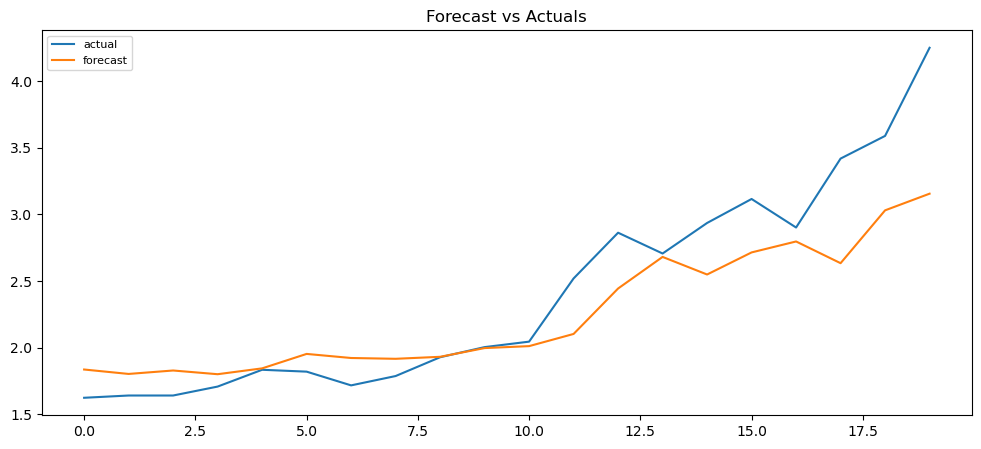

In [65]:
# Forecast
fc = ynew  # 95% conf
# Make as pandas series

fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
print(dataset['Price'].describe())
mx = max(dataset['Price'])
mn = min(dataset['Price'])
print(mx)
print(mn)
t_y = test_y*(mx-mn) + mn
fc_y = fc*(mx-mn) + mn

plt.figure(figsize=(12,5), dpi=100)
#plt._y, label='training')
plt.plot(t_y, label='actual')
plt.plot(fc_y, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
 #                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [67]:
test

array([[0.13685596, 0.10014391, 0.13849694],
       [0.13849694, 0.1904397 , 0.14407617],
       [0.14407617, 0.15311623, 0.14407617],
       [0.14407617, 0.22133279, 0.16606498],
       [0.16606498, 0.21728575, 0.20741719],
       [0.20741719, 0.14596629, 0.20282245],
       [0.20282245, 0.20028782, 0.16901875],
       [0.16901875, 0.05081391, 0.19199216],
       [0.19199216, 0.12541592, 0.23826718],
       [0.23826718, 0.18652749, 0.26320976],
       [0.26320976, 0.2716521 , 0.27666563],
       [0.27666563, 0.10751867, 0.43222845],
       [0.43222845, 0.02230418, 0.5447982 ],
       [0.5447982 , 0.        , 0.4936003 ],
       [0.4936003 , 0.07864916, 0.5687562 ],
       [0.5687562 , 0.04730642, 0.6278307 ],
       [0.6278307 , 0.16854036, 0.55759764],
       [0.55759764, 0.21170962, 0.7272727 ],
       [0.7272727 , 0.10153782, 0.7830654 ],
       [0.7830654 , 0.08368552, 1.        ]], dtype=float32)

In [42]:
test.index


AttributeError: 'numpy.ndarray' object has no attribute 'index'

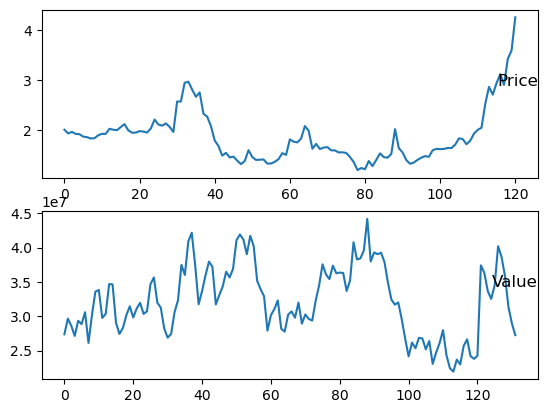

In [28]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()